<a href="https://colab.research.google.com/github/adeoluwa/API/blob/main/property_valuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
# sys.path.append("housing.csv")

from google.colab import drive 
drive.mount('/content/drive')

path = "/content/drive/MyDrive/housing.csv"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
# import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv(path)

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [ ]:
x


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [ ]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
train_data = x_train.join(y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12133,-117.21,33.93,4.0,10002.0,1468.0,5439.0,1397.0,5.0223,INLAND,152600.0
5432,-118.41,34.02,19.0,4702.0,1472.0,2636.0,1334.0,3.3955,<1H OCEAN,225000.0
9613,-120.48,37.29,17.0,2266.0,693.0,3200.0,664.0,1.5635,INLAND,60400.0
17634,-121.93,37.27,28.0,3428.0,753.0,1753.0,729.0,4.1033,<1H OCEAN,281000.0
18036,-121.91,37.23,22.0,2614.0,453.0,1240.0,462.0,6.0712,<1H OCEAN,271800.0
...,...,...,...,...,...,...,...,...,...,...
1003,-121.78,37.69,35.0,2853.0,588.0,1761.0,572.0,4.3533,INLAND,168400.0
11051,-117.86,33.79,31.0,3523.0,922.0,2660.0,949.0,3.1792,<1H OCEAN,146400.0
5217,-118.23,33.95,37.0,2667.0,671.0,2865.0,683.0,0.6831,<1H OCEAN,87500.0
1112,-121.59,39.79,20.0,743.0,171.0,395.0,168.0,1.6250,INLAND,88300.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f709311a1f0>,
      dtype=object)

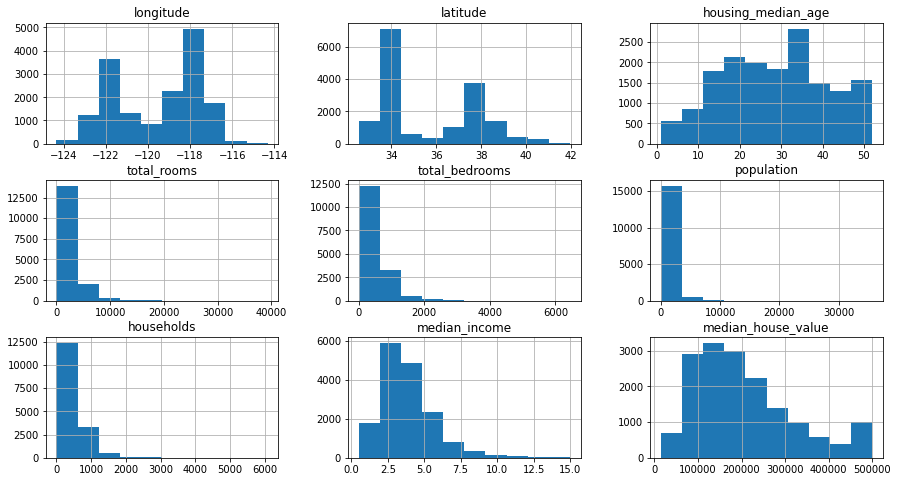

In [ ]:
train_data.hist(figsize=(15, 8))

In [ ]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924369,-0.108037,0.048736,0.071931,0.104509,0.059049,-0.010300,-0.039101
latitude,-0.924369,1.000000,0.010085,-0.040362,-0.069690,-0.113686,-0.074125,-0.084070,-0.149768
housing_median_age,-0.108037,0.010085,1.000000,-0.358464,-0.317301,-0.292292,-0.298902,-0.113086,0.109254
total_rooms,0.048736,-0.040362,-0.358464,1.000000,0.930465,0.860254,0.920540,0.196642,0.134077
total_bedrooms,0.071931,-0.069690,-0.317301,0.930465,1.000000,0.882057,0.981164,-0.010423,0.049581
population,0.104509,-0.113686,-0.292292,0.860254,0.882057,1.000000,0.909854,0.000387,-0.026215
households,0.059049,-0.074125,-0.298902,0.920540,0.981164,0.909854,1.000000,0.010440,0.064315
median_income,-0.010300,-0.084070,-0.113086,0.196642,-0.010423,0.000387,0.010440,1.000000,0.685497
median_house_value,-0.039101,-0.149768,0.109254,0.134077,0.049581,-0.026215,0.064315,0.685497,1.000000


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924369,-0.108037,0.048736,0.071931,0.104509,0.059049,-0.010300,-0.039101
latitude,-0.924369,1.000000,0.010085,-0.040362,-0.069690,-0.113686,-0.074125,-0.084070,-0.149768
housing_median_age,-0.108037,0.010085,1.000000,-0.358464,-0.317301,-0.292292,-0.298902,-0.113086,0.109254
total_rooms,0.048736,-0.040362,-0.358464,1.000000,0.930465,0.860254,0.920540,0.196642,0.134077
total_bedrooms,0.071931,-0.069690,-0.317301,0.930465,1.000000,0.882057,0.981164,-0.010423,0.049581
population,0.104509,-0.113686,-0.292292,0.860254,0.882057,1.000000,0.909854,0.000387,-0.026215
households,0.059049,-0.074125,-0.298902,0.920540,0.981164,0.909854,1.000000,0.010440,0.064315
median_income,-0.010300,-0.084070,-0.113086,0.196642,-0.010423,0.000387,0.010440,1.000000,0.685497
median_house_value,-0.039101,-0.149768,0.109254,0.134077,0.049581,-0.026215,0.064315,0.685497,1.000000


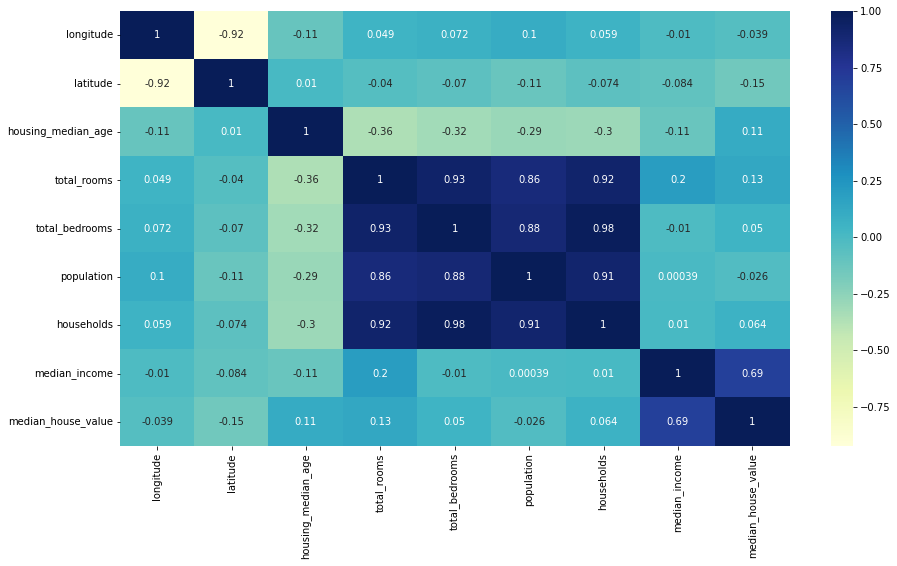

In [ ]:

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7092918040>,
      dtype=object)

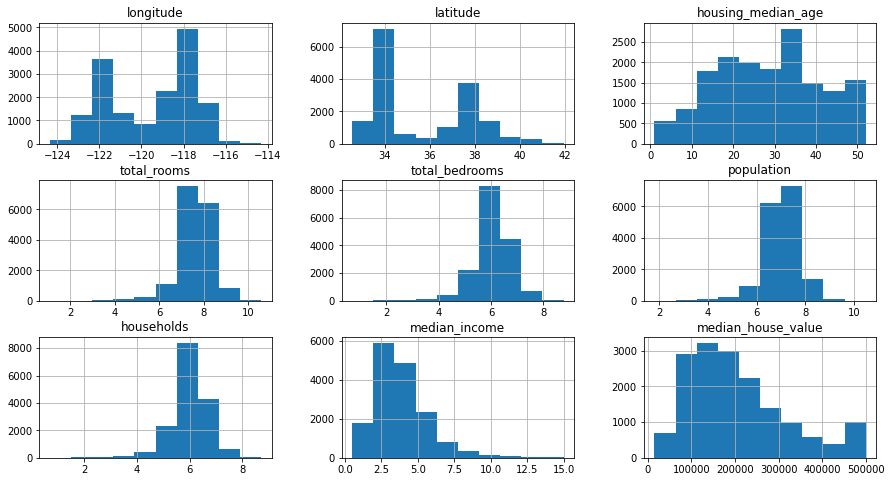

In [ ]:
train_data.hist(figsize=(15, 8))

In [ ]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7187
INLAND        5237
NEAR OCEAN    2091
NEAR BAY      1826
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12133,0,1,0,0,0
5432,1,0,0,0,0
9613,0,1,0,0,0
17634,1,0,0,0,0
18036,1,0,0,0,0
...,...,...,...,...,...
1003,0,1,0,0,0
11051,1,0,0,0,0
5217,1,0,0,0,0
1112,0,1,0,0,0


In [ ]:
train_data.join(pd.get_dummies(train_data.ocean_proximity))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12133,-117.21,33.93,4.0,9.210640,7.292337,8.601534,7.242798,5.0223,INLAND,152600.0,0,1,0,0,0
5432,-118.41,34.02,19.0,8.455956,7.295056,7.877397,7.196687,3.3955,<1H OCEAN,225000.0,1,0,0,0,0
9613,-120.48,37.29,17.0,7.726213,6.542472,8.071219,6.499787,1.5635,INLAND,60400.0,0,1,0,0,0
17634,-121.93,37.27,28.0,8.140024,6.625392,7.469654,6.593045,4.1033,<1H OCEAN,281000.0,1,0,0,0,0
18036,-121.91,37.23,22.0,7.869019,6.118097,7.123673,6.137727,6.0712,<1H OCEAN,271800.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,-121.78,37.69,35.0,7.956477,6.378426,7.474205,6.350886,4.3533,INLAND,168400.0,0,1,0,0,0
11051,-117.86,33.79,31.0,8.167352,6.827629,7.886457,6.856462,3.1792,<1H OCEAN,146400.0,1,0,0,0,0
5217,-118.23,33.95,37.0,7.889084,6.510258,7.960673,6.527958,0.6831,<1H OCEAN,87500.0,1,0,0,0,0
1112,-121.59,39.79,20.0,6.612041,5.147494,5.981414,5.129899,1.6250,INLAND,88300.0,0,1,0,0,0


In [ ]:
train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12133,-117.21,33.93,4.0,9.210640,7.292337,8.601534,7.242798,5.0223,152600.0,0,1,0,0,0
5432,-118.41,34.02,19.0,8.455956,7.295056,7.877397,7.196687,3.3955,225000.0,1,0,0,0,0
9613,-120.48,37.29,17.0,7.726213,6.542472,8.071219,6.499787,1.5635,60400.0,0,1,0,0,0
17634,-121.93,37.27,28.0,8.140024,6.625392,7.469654,6.593045,4.1033,281000.0,1,0,0,0,0
18036,-121.91,37.23,22.0,7.869019,6.118097,7.123673,6.137727,6.0712,271800.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,-121.78,37.69,35.0,7.956477,6.378426,7.474205,6.350886,4.3533,168400.0,0,1,0,0,0
11051,-117.86,33.79,31.0,8.167352,6.827629,7.886457,6.856462,3.1792,146400.0,1,0,0,0,0
5217,-118.23,33.95,37.0,7.889084,6.510258,7.960673,6.527958,0.6831,87500.0,1,0,0,0,0
1112,-121.59,39.79,20.0,6.612041,5.147494,5.981414,5.129899,1.6250,88300.0,0,1,0,0,0


In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12133,-117.21,33.93,4.0,9.210640,7.292337,8.601534,7.242798,5.0223,152600.0,0,1,0,0,0
5432,-118.41,34.02,19.0,8.455956,7.295056,7.877397,7.196687,3.3955,225000.0,1,0,0,0,0
9613,-120.48,37.29,17.0,7.726213,6.542472,8.071219,6.499787,1.5635,60400.0,0,1,0,0,0
17634,-121.93,37.27,28.0,8.140024,6.625392,7.469654,6.593045,4.1033,281000.0,1,0,0,0,0
18036,-121.91,37.23,22.0,7.869019,6.118097,7.123673,6.137727,6.0712,271800.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,-121.78,37.69,35.0,7.956477,6.378426,7.474205,6.350886,4.3533,168400.0,0,1,0,0,0
11051,-117.86,33.79,31.0,8.167352,6.827629,7.886457,6.856462,3.1792,146400.0,1,0,0,0,0
5217,-118.23,33.95,37.0,7.889084,6.510258,7.960673,6.527958,0.6831,87500.0,1,0,0,0,0
1112,-121.59,39.79,20.0,6.612041,5.147494,5.981414,5.129899,1.6250,88300.0,0,1,0,0,0


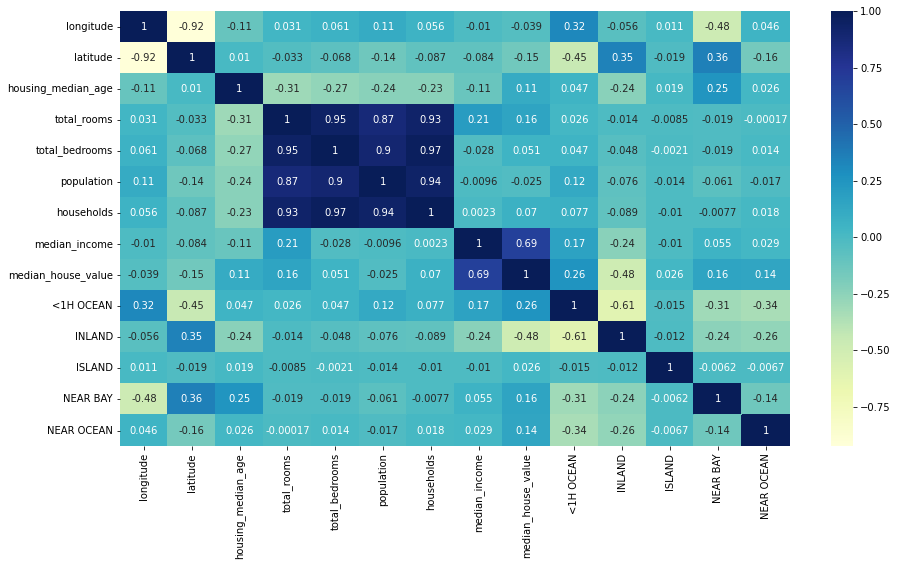

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

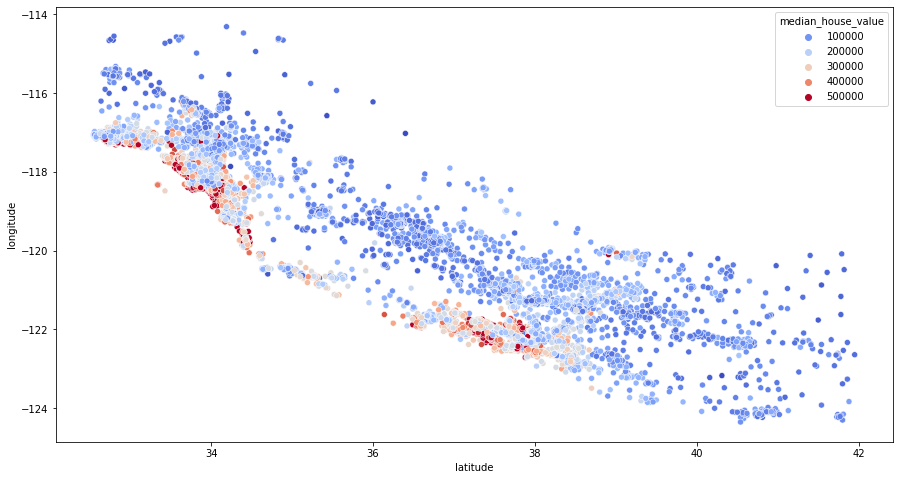

In [ ]:
plt.figure(figsize =(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [ ]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"] 
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

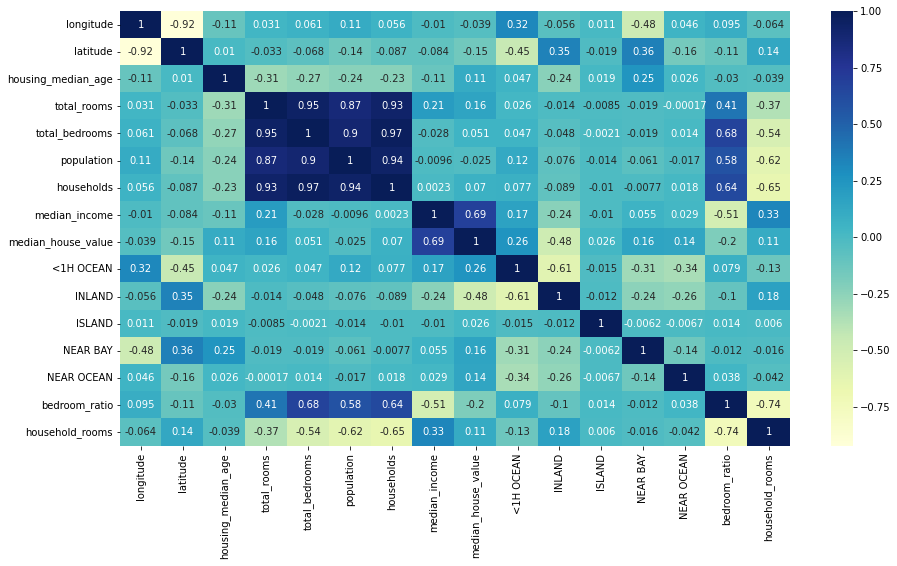

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

x_train, y_train = train_data.drop(["median_house_value"], axis=1), train_data["median_house_value"]
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()
reg.fit(x_train_s, y_train)


LinearRegression()

In [ ]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"] 
test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]

In [ ]:
x_test, y_test = test_data.drop(["median_house_value"], axis=1), test_data["median_house_value"]

In [ ]:
x_test_s = scaler.transform(x_test)

In [ ]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
6778,-118.17,34.12,37.0,7.717351,6.177944,6.903747,6.131226,4.2944,354700.0,1,0,0,0,0,0.800526,1.258696
13306,-117.62,34.08,22.0,7.873598,6.448889,7.425954,6.324359,3.1250,111800.0,0,1,0,0,0,0.819052,1.244964
7832,-118.16,33.90,28.0,7.787797,6.424869,7.783224,6.388561,2.7339,156700.0,1,0,0,0,0,0.824992,1.219022
2648,-124.10,40.50,30.0,7.564238,5.976351,6.904751,5.926926,2.2357,72300.0,1,0,0,0,0,0.790080,1.276250
13941,-117.18,34.30,33.0,5.991465,4.477337,4.276666,3.332205,1.8750,71300.0,0,1,0,0,0,0.747286,1.798048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12114,-117.23,33.94,7.0,9.487669,7.899895,8.819370,7.798933,3.5851,142000.0,0,1,0,0,0,0.832649,1.216534
7594,-118.24,33.90,40.0,7.177019,5.609472,6.804615,5.552960,2.8269,98000.0,1,0,0,0,0,0.781588,1.292467
8825,-118.36,34.09,33.0,8.150179,7.065613,7.520776,7.034388,2.0205,243800.0,1,0,0,0,0,0.866927,1.158620
4316,-118.34,34.09,14.0,8.017308,6.907755,7.433667,6.735780,2.2000,210000.0,1,0,0,0,0,0.861605,1.190257


In [ ]:
reg.score(x_test_s, y_test)

0.6780721093992392

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)


RandomForestRegressor()

In [ ]:
forest.score(x_test_s, y_test)

0.9403001818782383

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
  "n_estimators":[100, 200, 300],
  "min_samples_split":[2,4],
  "max_depth":[None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error",return_train_score=True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [75]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=300)

In [76]:
grid_search.best_estimator_.score(x_test_s, y_test)

0.9417985242502804